In [10]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

values = [1, 12, 120, 1200, 12000]
runs = 1

data = [[None] * len(values)] * runs
for i in range(runs):
    for j in range(len(values)):
        with open('intr/training_10_' + str(values[j]) + '_run' + str(i+1) + '.pkl', 'rb') as f:
            data[i][j] = pickle.load(f)

In [12]:
left_cumulative = np.zeros((runs, len(values), len(data[0][0])))
right_cumulative = np.zeros((runs, len(values), len(data[0][0])))

for i in range(runs):

    for j in range(len(values)):

        left_ids = set()
        right_ids = set()

        for k, episode in enumerate(data[i][j]):
            left_ids.update(set(episode['left_hand_touches']))
            right_ids.update(set(episode['right_hand_touches']))
            left_cumulative[i, j, k] = len(left_ids)
            right_cumulative[i, j, k] = len(right_ids)

In [16]:
#avg
left_avg = np.mean(left_cumulative, axis=0)
right_avg = np.mean(right_cumulative, axis=0)
left_avg

array([[0., 0., 1., ..., 6., 6., 6.],
       [0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 1., ..., 4., 4., 4.],
       [0., 0., 2., ..., 6., 6., 6.],
       [0., 0., 3., ..., 7., 7., 7.]])

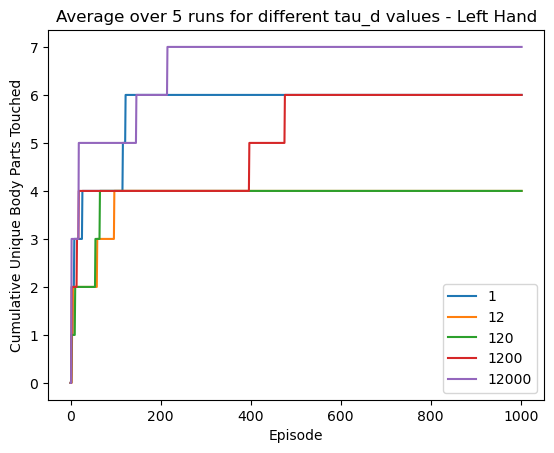

In [35]:
plt.plot(left_avg.T, label=values)
plt.xlabel('Episode')
plt.ylabel('Cumulative Unique Body Parts Touched')
plt.title('Average over 5 runs for different tau_d values - Left Hand')
plt.legend()
plt.show()

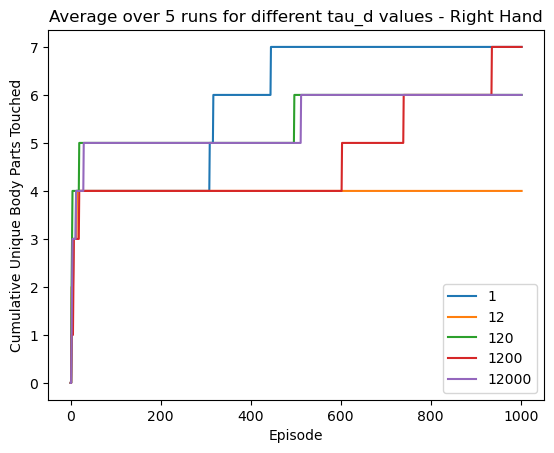

In [36]:
plt.plot(right_avg.T, label=values)
plt.xlabel('Episode')
plt.ylabel('Cumulative Unique Body Parts Touched')
plt.title('Average over 5 runs for different tau_d values - Right Hand')
plt.legend()
plt.show()